In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_file = pd.read_csv('/content/drive/My Drive/train.csv')
test_file = pd.read_csv('/content/drive/My Drive/test.csv')

In [5]:
train_file

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...,...
82652,@wineschach,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,NaN,Montecillo,Tempranillo
82653,NaN,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,NaN,Vivác Winery,Cabernet Sauvignon
82654,@vossroger,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone,Gamay
82655,@vossroger,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",NaN,91,20.0,Bordeaux,Haut-Médoc,NaN,Château Beaumont,Bordeaux-style Red Blend


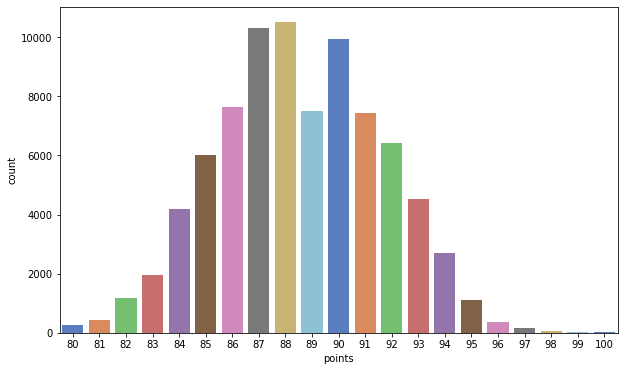

In [0]:
plt.figure(figsize=(10, 6))
sns.countplot(train_file["points"], palette="muted")


In [0]:
train_file['user_name'].value_counts()

@vossroger          17539
@wineschach          8320
@vboone              6908
@paulgwine           6824
@kerinokeefe         5675
@mattkettmann        4298
@wawinereport        3471
@JoeCz               3054
@gordone_cellars     2768
@AnneInVino          2314
@laurbuzz            1055
@suskostrzewa         511
@worldwineguys        503
@bkfiona               20
@winewchristina         4
Name: user_name, dtype: int64

In [0]:
#Converting categorical to integer variable

train_file['variety'] = pd.Categorical(train_file.variety).codes

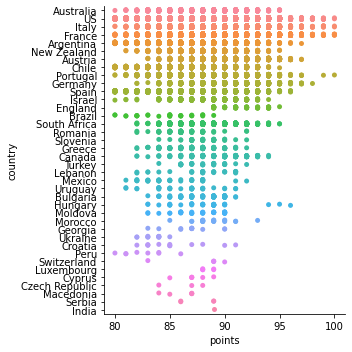

In [7]:
#Having an over-all idea of the rating each country gets

sns.catplot(x = 'points', y = 'country', data = train_file)


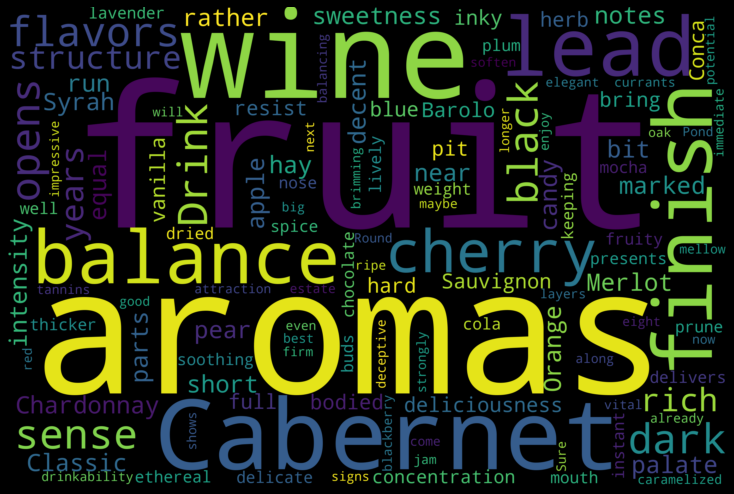

In [0]:
from wordcloud import WordCloud, STOPWORDS
text = train_file.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
def getQuality(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'

In [0]:
train_file['points'] = train_file['points'].apply(getQuality)


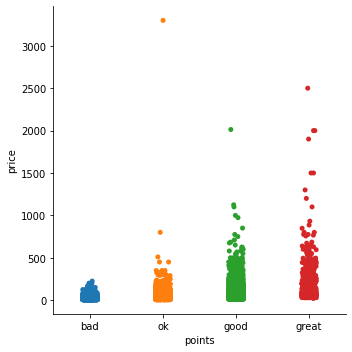

In [0]:
#Correlation between price and points.

sns.catplot(x = 'points', y = 'price', data = train_file)


In [7]:
!pip install contractions

     |████████████████████████████████| 245kB 4.7MB/s 
     |████████████████████████████████| 317kB 7.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81703 sha256=a9728a79f9e5ead205a6363d26593589855882be7d4e639dbd6f16254028af6c
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re, string, unicodedata
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.probability import FreqDist
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def url_replace(text):
  return re.sub('http\S+|www.\S+', '', text)
  #re.sub(r"[\n\t\r]*", "", text)
  #return text


def strip_html(text):
        text = str(text)
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()


def replace_contractions(text):
    return contractions.fix(text)


def denoise_text(text):
    #text = url_replace(text)
    text = strip_html(text)
    #print(len(text1))
    text = replace_contractions(text)
    #print(len(text2))
    text = re.sub(r"[\n\t\r]*", "", text)
    return text




In [0]:
clean_text_train = []
clean_text_test = []
for i in range(len(train_file)):
    clean_text_train.append(train_file['review_description'][i])

for i in range(len(test_file)):
    clean_text_test.append(test_file['review_description'][i])

In [0]:
#Tokeinzation
  words_train = []
  for i in range(len(clean_text_train)):
    words_train.append(nltk.word_tokenize(clean_text_train[i]))
  
  words_test = []
  for i in range(len(clean_text_test)):
    words_test.append(nltk.word_tokenize(clean_text_test[i]))


In [0]:
#PreProcessed Data
def url_replace(text):
  return re.sub('http\S+|www.\S+', '', text)
  #re.sub(r"[\n\t\r]*", "", text)
  #return text


def strip_html(text):
        text = str(text)
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^A-Za-z]+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stopwords_modified = stopwords.words('english') 
    for word in words:
        if word not in stopwords_modified:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    #words = url_replace(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return words

def words_preprocessed(words):
  words_preprocessed = []
  for i in range(len(words)):
    words_preprocessed.append(normalize(words[i]))
  return words_preprocessed
words_preprocessed_train  = words_preprocessed(words_train)
words_preprocessed_test = words_preprocessed(words_test)


In [0]:
train_file['preprocessed_review'] = words_preprocessed_train
test_file['preprocessed_review'] = words_preprocessed_test



In [0]:

train_file.drop(['designation','region_1','region_2','winery'], inplace=True, axis = 1)
test_file.drop(['designation','region_1','region_2','winery'], inplace=True, axis = 1)


In [0]:
list_contents_train =[]
list_val = []
for index in range(len(train_file)):
    list_contents_train.append(' '.join(train_file['preprocessed_review'][index]))


In [0]:
list_contents_test =[]
list_val = []
for index in range(len(test_file)):
    list_contents_test.append(' '.join(test_file['preprocessed_review'][index]))

In [0]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 5000,
    stop_words = 'english'
)
tfidf.fit(list_contents_train)
text = tfidf.transform(list_contents_train)

In [0]:
test_tfidf = tfidf.transform(list_contents_test)

In [0]:
tfidf_df = pd.DataFrame(text.toarray())

In [0]:
tfidf_df_test = pd.DataFrame(test_tfidf.toarray())

In [0]:
del text

In [0]:
training = pd.concat([tfidf_df,train_file], axis=1, ignore_index=True)

In [0]:
train_file.reset_index(inplace=True)

In [0]:
testing = pd.concat([tfidf_df_test,test_file], axis=1, ignore_index=True)

In [0]:
del tfidf_df
del train_file
del tfidf_df_test

In [0]:
del list_contents_train
del list_contents_test

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


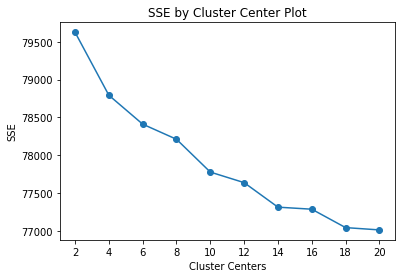

In [0]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [0]:
clusters = MiniBatchKMeans(n_clusters=7, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

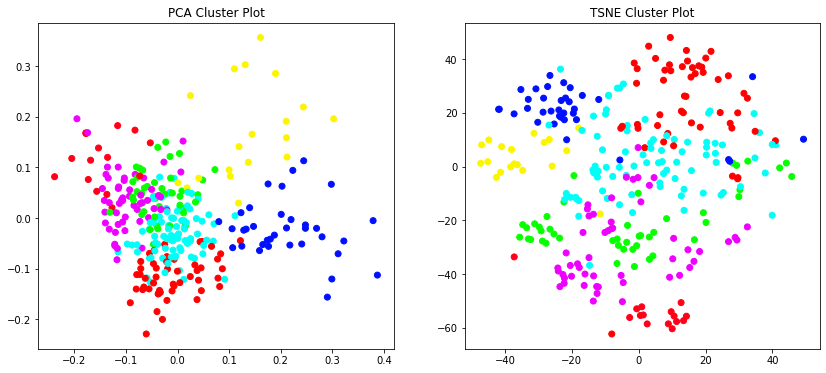

In [0]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

In [0]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)



Cluster 0
white,acidity,citrus,pear,palate,lemon,finish,peach,flavor,apple

Cluster 1
firm,rich,ripe,wood,drink,tannins,structure,age,fruit,wine

Cluster 2
oak,blend,dry,tannins,cherry,sauvignon,merlot,flavor,blackberry,cabernet

Cluster 3
make,dry,aromas,light,palate,cherry,finish,flavor,fruit,wine

Cluster 4
attractive,soft,ripe,ready,fruit,crisp,fruity,drink,acidity,wine

Cluster 5
fruit,spice,palate,berry,cherry,finish,plum,black,flavor,aromas

Cluster 6
spice,red,berry,offer,black,aromas,alongside,cherry,palate,tannins


In [0]:
training = training.drop([5002,5003,5008], axis = 1)
testing = testing.drop([5002,5003,5007], axis = 1)

In [29]:
testing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,88,35.0,Oregon,"[nicely, differentiate, companion, stewart, bo..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",90,60.0,Mendoza Province,"[char, smoky, herbal, aromas, blackberry, tren..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",87,38.0,California,"[slightly, sour, funky, earth, restrain, white..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",91,20.0,Mendoza Province,"[concentrate, midnightblack, malbec, deliver, ..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",90,49.0,Tuscany,"[earthy, aromas, suggest, grill, porcini, leat..."


In [0]:
 #0.15 for val, 0.15 for test, 0.7 for train
test_size = int(training.shape[0] * 0.15)

# Shuffle the data
training = training.sample(frac=1)
# Split tweets df to test/val/train
test_df = training[:test_size]
train_df = training[test_size:]
test_labels = training[5008][:test_size]
train_labels = training[5008][test_size:]



In [49]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5002,5005,5006,5007,5008
6383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6383,NaN,US,bad,17.0,California,17
62846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62846,@mattkettmann,US,ok,27.0,California,20
32265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32265,NaN,US,ok,28.0,New York,3
72499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.219575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72499,@vossroger,France,ok,55.0,Champagne,4
56003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162368,0.0,0.0,0.0,0.0,0.272009,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56003,@kerinokeefe,Italy,ok,37.0,Piedmont,11


In [0]:
#train_df = train_df.iloc[:,[0,1,4,5]]
#test_df = test_df.iloc[:,[0,1,4,5]]


In [0]:
from sklearn import preprocessing

categorical_feature_mask = train_df.dtypes==object
#Filter categorical columns using mask and turn it into a list


In [0]:
categorical_cols = train_df.columns[categorical_feature_mask].tolist()
#train_df[categorical_cols] = train_df[categorical_cols].apply(le.fit_transform)

In [0]:
categorical_cols = categorical_cols[:-1]

In [88]:
#train_df.dropna(inplace=True,axis = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
del training

In [53]:
le = preprocessing.LabelEncoder()
train_df[5001] = le.fit_transform(train_df[5001].fillna('0'))
train_df[5002] = le.fit_transform(train_df[5002].fillna('0'))
train_df[5005] = le.fit_transform(train_df[5005].fillna('0'))
train_df[5007] = le.fit_transform(train_df[5007].fillna('0'))
#train_df[5006] = le.fit_transform(train_df[5006].fillna('0'))


test_df[5001] = le.fit_transform(test_df[5001].fillna('0'))
test_df[5002] = le.fit_transform(test_df[5002].fillna('0'))
test_df[5005] = le.fit_transform(test_df[5005].fillna('0'))
test_df[5007] = le.fit_transform(test_df[5007].fillna('0'))
#test_df[5006] = le.fit_transform(test_df[5006].fillna('0'))


train_df.drop([5000],axis=1,inplace=True)
train_df.drop([5008],inplace=True,axis = 1)
test_df.drop([5000],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [54]:
#train_df.reset_index(drop=True)
train_df.fillna(0,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
train_labels.fillna(0,inplace=True)
train_labels = train_labels.astype(int)

In [56]:
len(train_df)

70259

In [57]:
train_df.drop([5006],inplace=True,axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf=RandomForestClassifier()

clf.fit(train_df,train_labels)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
test_df.fillna(0,inplace=True)
#test_df.drop([5006],inplace=True,axis = 1)
test_df.drop([5008],inplace=True,axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
len(test_df)

12398

In [0]:
y_pred=clf.predict(test_df)

In [66]:
print(classification_report(test_labels,y_pred))
accuracy_score(test_labels,y_pred)

              precision    recall  f1-score   support

           0       0.59      0.85      0.70       872
           1       0.79      0.48      0.60       118
           2       0.95      0.23      0.37       160
           3       0.62      0.74      0.68      1164
           4       0.89      0.38      0.53       188
           5       0.63      0.93      0.76      1380
           6       0.73      0.54      0.62       114
           7       0.91      0.54      0.67       110
           8       0.84      0.69      0.76       163
           9       0.76      0.61      0.68       301
          10       0.88      0.38      0.53       392
          11       0.56      0.88      0.68       301
          12       0.89      0.58      0.70       127
          13       0.92      0.44      0.59       181
          14       0.65      0.81      0.72      1628
          15       0.90      0.90      0.90       277
          16       0.87      0.54      0.67       123
          17       0.64    

0.6922084207130182

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
#Applying cluster number

neigh = KNeighborsClassifier(n_neighbors=180)
neigh.fit(train_df, train_labels)
y_pred = neigh.predict(test_df)
print(classification_report(test_labels,y_pred))
accuracy_score(test_labels,y_pred)

              precision    recall  f1-score   support

           0       0.29      0.55      0.38       827
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       157
           3       0.42      0.26      0.32      1138
           4       0.20      0.21      0.21       151
           5       0.21      0.30      0.24      1441
           6       0.00      0.00      0.00       121
           7       0.00      0.00      0.00       126
           8       0.28      0.55      0.37       159
           9       0.42      0.53      0.47       355
          10       0.00      0.00      0.00       383
          11       0.38      0.75      0.50       316
          12       0.21      0.10      0.14       116
          13       0.30      0.04      0.07       162
          14       0.37      0.56      0.45      1619
          15       0.31      0.89      0.46       274
          16       0.24      0.18      0.21       132
          17       0.31    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3009356347798032

Considering only reviews.

In [0]:
 #0.15 for val, 0.15 for test, 0.7 for train
test_size = int(train_file.shape[0] * 0.15)

# Shuffle the data
train_file = train_file.sample(frac=1)
# Split tweets df to test/val/train
test_df = train_file[:test_size]
train_df = train_file[test_size:]


train_texts, train_labels = list(train_df.preprocessed_review), list(train_df.variety)
test_texts, test_labels = list(test_df.preprocessed_review), list(test_df.variety)


In [0]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score


In [0]:
#Training corpus
list_contents =[]
list_val = []
list_test = []

for index in range(len(train_texts)):
    list_contents.append(' '.join(train_texts[index]))

for index in range(len(test_texts)):
    list_test.append(' '.join(test_texts[index]))   

In [0]:
#SGD Classifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 10))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-4, random_state=42, max_iter=40, tol=None)),
               ])
sgd.fit(list_contents, train_labels)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 10), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=No...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                     

In [0]:
y_pred = sgd.predict(list_test)
print(classification_report(test_labels,y_pred))


              precision    recall  f1-score   support

           0       0.57      0.83      0.68       838
           1       0.82      0.24      0.38       131
           2       0.97      0.20      0.34       152
           3       0.63      0.72      0.67      1140
           4       0.85      0.35      0.50       176
           5       0.63      0.92      0.75      1369
           6       0.90      0.36      0.51       122
           7       0.84      0.47      0.61       125
           8       0.88      0.62      0.73       159
           9       0.69      0.48      0.57       310
          10       0.93      0.29      0.44       380
          11       0.71      0.81      0.75       349
          12       0.84      0.50      0.63       122
          13       0.89      0.40      0.55       163
          14       0.66      0.84      0.74      1616
          15       0.60      0.48      0.53       288
          16       0.79      0.34      0.47       143
          17       0.58    

Confusion matrix on validation set.

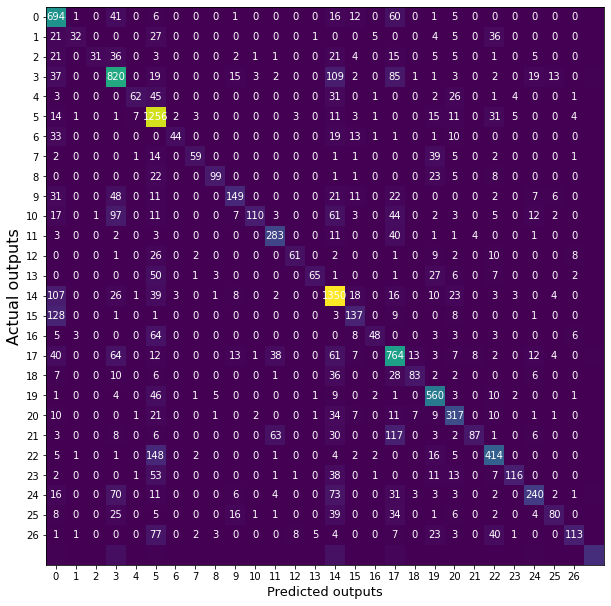

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)

fig, ax = plt.subplots(figsize=(10, 15))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize='13', color='black')
ax.set_ylabel('Actual outputs', fontsize='16', color='black')
ax.xaxis.set(ticks=range(27))
ax.yaxis.set(ticks=range(27))
for i in range(27):
    for j in range(27):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [90]:
training.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5001,5002,5005,5006,5007
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,36,3,37.0,42
9618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,36,1,50.0,345
62686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,3,18.0,177
49835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,12,0,13.0,28
55176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,7,0,11.0,156


In [0]:
train_labels = training[5007]
train_df = training.drop([5007],axis=1)
test_df = testing


In [34]:
training.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5004,5005,5006,5007
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Australia,bad,10.0,Australia Other,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@wawinereport,US,ok,15.0,Washington,17
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Italy,good,80.0,Piedmont,11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@vossroger,France,ok,22.0,Southwest France,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@vossroger,France,ok,33.0,France Other,9


In [38]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5004,5005,5006
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@paulgwine,US,88,35.0,Oregon
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@wineschach,Argentina,90,60.0,Mendoza Province
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@vboone,US,87,38.0,California
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@wineschach,Argentina,91,20.0,Mendoza Province
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@kerinokeefe,Italy,90,49.0,Tuscany


In [0]:
test_df[5005].fillna(0,inplace=True)

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()
train_df[5000] = le.fit_transform(train_df[5000].fillna('0'))
train_df[5001] = le.fit_transform(train_df[5001].fillna('0'))
train_df[5004] = le.fit_transform(train_df[5004].fillna('0'))
train_df[5006] = le.fit_transform(train_df[5006].fillna('0'))
#train_df[5006] = le.fit_transform(train_df[5006].fillna('0'))


test_df[5000] = le.fit_transform(test_df[5000].fillna('0'))
test_df[5001] = le.fit_transform(test_df[5001].fillna('0'))
test_df[5004] = le.fit_transform(test_df[5004].fillna('0'))
test_df[5005] = le.fit_transform(test_df[5005].fillna('0'))
test_df[5006] = le.fit_transform(test_df[5006].fillna('0'))


#train_df.drop([5000],axis=1,inplace=True)
#test_df.drop([5000],axis=1,inplace=True)

In [0]:
train_labels.fillna(0,inplace=True)
train_df.fillna(0,inplace=True)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf=RandomForestClassifier()

clf.fit(train_df,train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(test_df)


In [0]:
y_pred_df = pd.DataFrame(y_pred)

As we can see, Just from the review description, many of the varieties can be predicted.

In [0]:
final_data = pd.concat((test_df,y_pred_df),axis = 1)

In [0]:
from google.colab import files

training.to_csv('df_training.csv')


In [51]:
files.download('df_training.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 45278, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

To Summarize:

1 - Import Data

2 - Find Correlations between some variables

3 - PreProcess Text features

4 - KMeans (Cluster text features to various clusters and denote each text with the corresponding cluster)

5 - Train data without text features; instead using cluster numbers

6 - Since the F1 score was very less, we used only text features to predict the classes.

7- Fit tfidf to training text reviews. Appended tfidf vector to original training file. 
F1 score of 70 on validation set.
Not enough RAM for GridSearchCV.  Could have been better

8- Tested data on tfidf transformed data of text_file.
